# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2024/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday October 1st, 2024 at 23:55. Hand in your IPython notebook file (with extension `.ipynb`) via DTU Learn

# Part 1: Exploring the friendship paradox. 

This first part draws on the friendship paradox exercise from Week 3. You should provide solutions to the following exercises from **Part 3** of that week.

* *The friendship paradox in BA networks*
* *The friendship paradox more generally*
* *The friendship paradox and the configuration model*
* *Growth without preferential attachment*


# Part 2: Stats of the Country Music Network

This second part requires you to have built the network of Country Musicians as described in the exercises for Week 4. You should complete the following exercise from **Part 2**.

* *Simple network statistics and analysis*

And the following exercise from **Part 3**

* *Let's build a simple visualization of the network*

And that's it! You're all set.

## Simple Network Statistics and Analysis

In [7]:
# Imports
import networkx as nx
import re
import matplotlib.pyplot as plt
import os
import json
import collections


### Network builder object, using the list of country musicians obtained from Wikipedia

In [8]:
# Network builder, using the list of country musicians obtained from wikipedia.
class NetworkBuilder:
    def __init__(self, path) -> None:
        self.country_music_network = nx.DiGraph()
        self.path = path
        self.file_list = []
        self.wiki_pages_list = None
        self.initial_wiki_pages_list()
        self.read_file_names()
        self.text_length = 0

    
    def initial_wiki_pages_list(self):
        with open('wiki_country_musicians_list.txt', 'r') as file:
            data = file.read()
            
            wiki_links_extracted = re.findall(r'\[\[(.+?)\]\]', data)
            self.wiki_pages_list = wiki_links_extracted
            
    def populate_network(self):
        self.country_music_network

    def read_file_names(self):
        for root, dirs, files in os.walk(self.path):
            self.file_list=files

    def go_through_files(self):
        for file in self.file_list:
            if "File" not in file and "Image" not in file and "country music" not in file:
                #print(file)
                json_file = self.read_json_file(file)
                wiki_links_from_page = self.extract_links_from_json(json_file)
                #print(wiki_links_from_page)
                self.compare_links_with_list(wiki_links_from_page, file[:-5])

            

            
    def read_json_file(self, file):
        with open(f'wiki_country_musicians/{file}', 'r') as f:
                file=json.load(f)
        return file        

            

    def extract_links_from_json(self, file):
        #print(file)
        wiki_links_extracted = []
        page_keys = list(file['query']['pages'].keys())
        for key in page_keys:
            if key != '-1':
                text = file['query']['pages'][key]['revisions'][0]['*']
                words = re.findall(r'\w+', text)
                self.text_length = len(words)
                wiki_links_extracted = re.findall(r'\[\[(.+?)\]\]', text)
        return wiki_links_extracted
        

    def compare_links_with_list(self, wiki_links_from_page, file):
        for link in wiki_links_from_page:
            if link in self.wiki_pages_list:
                self.country_music_network.add_node(file, length_of_content = self.text_length)
                self.add_link_to_network(link, file)

    def add_link_to_network(self, link, file):
        self.country_music_network.add_edge(file, link)


### Using the network builder to build the network

In [9]:
nb = NetworkBuilder('wiki_country_musicians')
nb.go_through_files()

### Extracting subgraph
As the exercise suggested performing the simple analysis on largest component, the corresponding subgraph is created.

In [10]:
largest_component = max(nx.weakly_connected_components(nb.country_music_network), key=len)
subgraph = nb.country_music_network.subgraph(largest_component)

The following questions are answered.
1. What is the number of nodes in the network?
2. What are the number of links in the network?

In [11]:
print(f"The network has {len(subgraph.nodes)} nodes, and {len(subgraph.edges)} links.")

The network has 1937 nodes, and 17394 links.


The in and out degree distributions are compared for the subgraph of the network.

In [12]:
# Plot the degree distribution of the given networx graph.
def plot_degree_distributions(graph):
    in_degrees = dict(graph.in_degree())
    out_degrees = dict(graph.out_degree())

    in_values = list(in_degrees.values())
    out_values = list(out_degrees.values())

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(in_values, bins=50, alpha=0.5)
    plt.title("In-Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    plt.hist(out_values, bins=50, alpha=0.5)
    plt.title("Out-Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

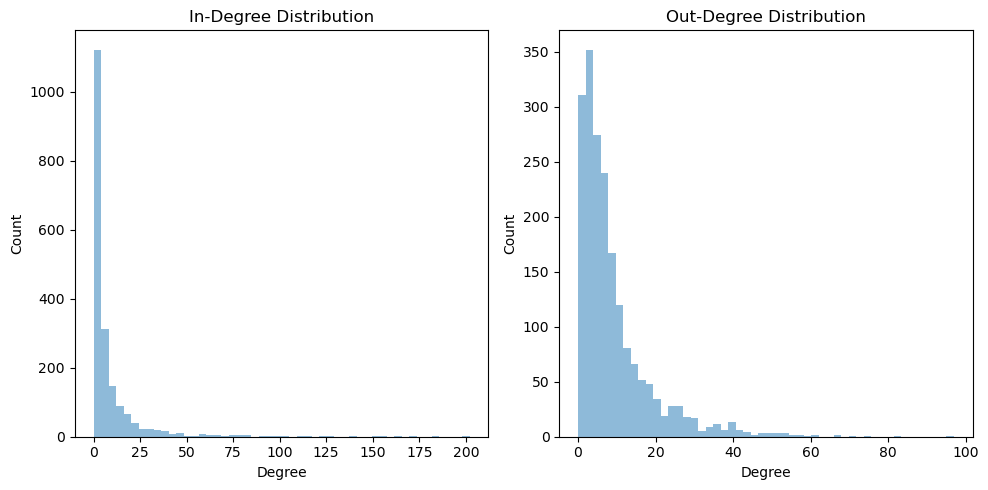

In [13]:
plot_degree_distributions(subgraph)

Two plots showing the in and out degree distribution of the largest connected component of the country musicians network.

#### Observations
There is a clear difference in the in and out degree distributions for the network, even though both show a power-law distribution. While the in-degree distribution is very right skeweed, the out-degree distribution is less so. Most nodes have a low in-degree, a few nodes have much higher in-degrees. This is also the the case with out-degrees, although to a lesser extent as the number of outward links for even the most influential nodes is half that of their in-degree counterpart.

An interpretation is that musicians with high out-degrees collaborate or write songs for other musicians (as is the case with Hillary Lindsey, the top out-degree artist), while musicians with large in-degrees are simply very influential, and have a larger footprint in their world (Case with Willie Nelson, highly influential also in other aspects (acting, activism, sub-genre establishment)), and smaller artists cite larger, popular artists as influences and inspiration in interviews/news articles, which is then transferred to their wikipedia articles.

### Comparison with random network

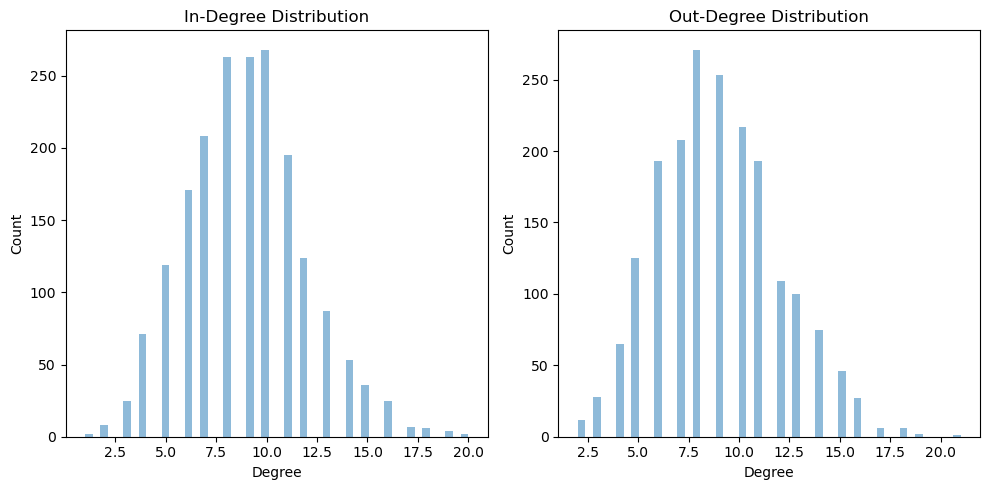

In [15]:

random_graph = nx.gnm_random_graph(len(subgraph.nodes), len(subgraph.edges), directed=True)
plot_degree_distributions(random_graph)


Plots showing the degree distribution of random graphs with the same number of nodes and edges as the largest connected component of the country musicians graph.

#### Observations
These plots show that the degree distribution for both in and out degrees follows a normal distribution, quite unlike reality.

### Scale-free "random" network 

In [25]:
scale_free_version = nx.scale_free_graph(len(subgraph.nodes)).to_directed()
while len(scale_free_version.edges) > len(subgraph.edges):
    scale_free_version.remove_edge(*list(scale_free_version.edges())[-1])

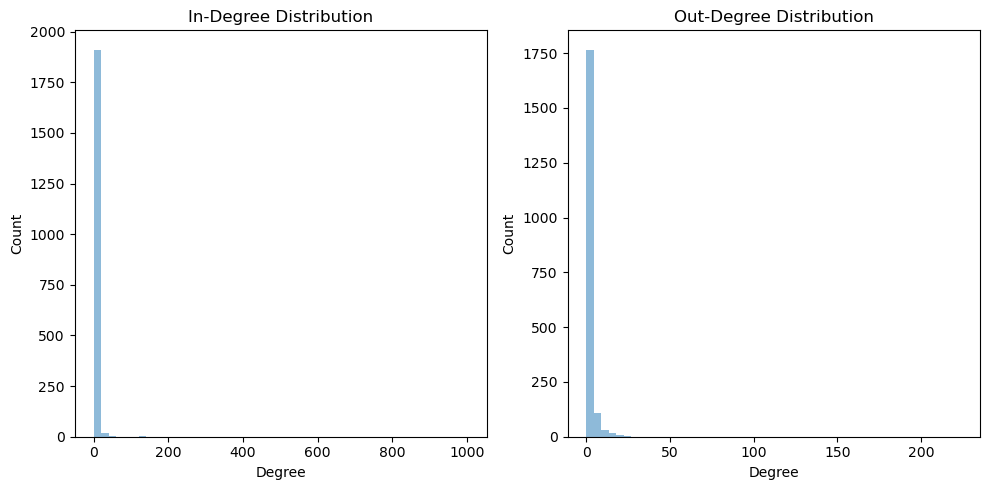

In [26]:
plot_degree_distributions(scale_free_version)

Plots showing the degree distribution of a "random" scale-free network with the same number of nodes and edges.

### Observations
A scale-free network with the same number of edges and nodes has a larger disparity between in and out degrees compared to the real-world example. The default values of the $\alpha$, $\beta$, and $\gamma$ parameters do not reflect what is observed in the network.

An interpretion is according to https://arxiv.org/abs/1801.03400 is questioning the scale-free hypothesis itself (the out-degree distribution for the largest connected component does indeed resemble a log-normal distribution)

### Largest nodes in terms of degrees
1. Who are the top 5 most connected performers?

In [29]:
#With a little help from the collections package.

out_degree = dict(nb.country_music_network.out_degree())
in_degree = dict(nb.country_music_network.in_degree())


c = collections.Counter(out_degree)
print("Most connected out_degree performers",c.most_common(5))

d = collections.Counter(in_degree)
print("Most connected in-degree performers",d.most_common(5))



Most connected out_degree performers [('Hillary Lindsey', 97), ('Pam Tillis', 82), ('Randy Travis', 75), ('Vince Gill', 71), ('Patty Loveless', 67)]
Most connected in-degree performers [('Willie Nelson', 202), ('Johnny Cash', 183), ('Elvis Presley', 173), ('Dolly Parton', 162), ('George Jones', 156)]


Top 10 nodes in terms of page length.

In [40]:
node_attributes = nx.get_node_attributes(subgraph, 'length_of_content')

sorted_nodes = sorted(node_attributes, key=node_attributes.get, reverse=True)

top_10_artists = sorted_nodes[:10]
for node in top_10_artists:
    print(f"{node}, {node_attributes[node]}")

Beyoncé, 62856 
Taylor Swift, 56351 
Miley Cyrus, 51262 
Justin Bieber, 50693 
Carrie Underwood, 45245 
Justin Timberlake, 44775 
Demi Lovato, 44189 
Bob Dylan, 41087 
Ed Sheeran, 36322 
Elvis Presley, 33740 


### Visualizing

In [41]:
## This part takes a long time to run. 2minutes30seconds for me.

#First, convert to undirected graph as suggested.
undirected_version = subgraph.to_undirected()
# Define the desired layout (kamada_kawai) to be able to set different parameters.
d = dict(undirected_version.degree)
node_size = [v for v in d.values()]
length_of_content = list(nx.get_node_attributes(undirected_version, "length_of_content", default=0).values())
pos_kk = nx.kamada_kawai_layout(undirected_version)



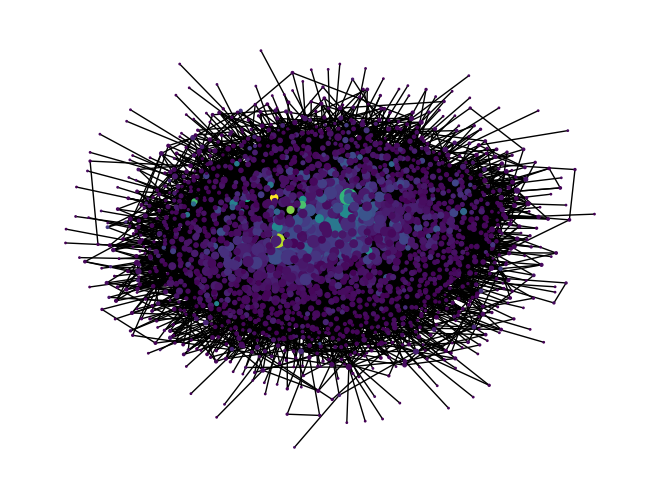

In [42]:
# Draw the graph.
nx.draw(undirected_version,pos=pos_kk, node_size=node_size, node_color=length_of_content, cmap='viridis')